## Your info
* NetID(s): aaj46
* Name(s): Alexander Joos
---

## Introduction and Hypothesis

####Introduction

I am currently in a communication and technology class, INFO 2450, this semester, and I wanted to center my project around communication dynamics since we have talked about a lot about technology’s afforcance of mediating and curating speech. Specifically, I wanted to analyze text detailing these furnished communications within networks. Much of the text that I interact with is in the form of shorter form messages through social media and email. I feel that these types of corpus are a step away from the more traditional literary analysis that we have looked at in class, as each text is part of a larger story, with both a sender and receiver. The idea of presenting your message to a specific recipient often changes the verbs and tones used to communicate messages, arrange meetings, or generally how one dresses up the content.

Social media is often more of a one-to-many type of communication, where people morph both image and textual content into an ideal self. This appeal can be seen as one that any person could look at, given the size of social networks. However, email narrows down this focus. Senders modify taglines, talk about events in certain ways, and manipulate verb choice based on the specific person that they are emailing, and thus use different patterns to communicate with different people.

To be able to extract ‘culture’ from a corpus like this, I gravitated towards the Enron emails dataset. Bounding the network to a workplace creates more measurable power markings through a corporate hierarchy, and the mix between business and personal communications binds the variety of a sender's outreach to the company cultural sphere. Implied receiver labels like work friends, work spouses, and ingratiators certainly exist in how each person conveys the message body. One can look at communication profiles of individuals talking up or down, as well as how a position may entail a certain communication persona.

Beyond coincidental and hierarchical factors, power expression also occurs through gender. Specifically, Prabhakaran et al. (2014) discuss a “gender environment,” defined as the gender makeup of message recipients, and illustrate its effect in determining power within communications. Steffensmeier et al. (2013) further explore female involvement in workplace crime partially within Enron, underscoring how gender interacts with corporate dynamics and conspiracy.

####Hypothesis

Building on the idea that communication in workplace networks reflects power dynamics, social roles, and identity curation, I hypothesize the following:

> "Individuals within a workplace network adjust their communication style, specifically their choice of verbs, tone, and formality based on hierarchical position, gender dynamics, and perceived relational closeness. Men will show more power-associated language than women, while senders will align their communication style with personas tied to their workplace role."

This hypothesis explores two key aspects:

- Hierarchical Influence: Employees will use more  deferential language when communicating “upward” in the corporate hierarchy and more casual, authoritative, or instructional language when speaking “downward”.

- Relational Closeness: Certain employees, will exhibit unique patterns of informality that set their communication apart from purely transactional work relationships (Steffensmeier et al., 2013).

####Methodological Contribution

While earlier studies laid the groundwork for understanding gender and power in communication, my work uses modern computational tools to streamline this kind of analysis. I use Riveter, an NLP toolkit that simplifies linguistic feature extraction such as identifying gendered language, sentiment, and tone shifts through verb-subject pairs. Riveter allows for consistent and scalable classification of linguistic patterns, replacing manual coding required in earlier research. Combined with large language models (LLMs) for text cleaning and classification, I believe that this approach will create a more generalized precedant that remains accurate, but is flexible to work with the different shapes of emails in this dataset. If this approach is successful, then when looking at other types of sender receiver networks, message isolation can be easily and adaptively changed just through prompting, and genderization on increasingly less look-up-able names like gamertags and usernames can be accomplished. This also could provide an accessible alternative that doesn't have to rely on social security lookups like in the Prabhakaran et al. study.

## 2. Data and methods

In [ ]:
#riveter reqires a lot of installs, and in order to save my work, I mounted drive
from google.colab import drive
drive.mount('/content/gdrive')
colab_directory_path = '/content/gdrive/My Drive/colab-output/riveter-test'
%cd /content/gdrive/My Drive/colab-output/riveter-test
! git clone -q https://github.com/maartensap/riveter-nlp.git
%ls
%cd /content/gdrive/My Drive/colab-output/riveter-test/riveter-nlp/riveter
!pip install -U -q spacy-experimental
!pip install -q https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf
!python -m spacy download en_core_web_sm -q
!pip install -q seaborn

Mounted at /content/gdrive
/content/gdrive/My Drive/colab-output/riveter-test
fatal: destination path 'riveter-nlp' already exists and is not an empty directory.
riveter-nlp/
/content/gdrive/My Drive/colab-output/riveter-test/riveter-nlp/riveter
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from collections import defaultdict
import pandas as pd
from riveter import Riveter #for getting riveter power dynamics
import seaborn as sns
import matplotlib.pyplot as plt

import pickle #for saving files
import kagglehub #pulls the dataset from kaggle
import numpy as np
import pandas as pd
import os
import re
import requests
from sqlalchemy import create_engine, text #merging title and name on email
import nltk #gender classification
from nltk.corpus import names
from tqdm import tqdm
tqdm.pandas()

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from huggingface_hub import login #huggingface api key
import json
import math
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #hyperparameter tuning on dbscan
from PIL import Image #image display

### Part 1: Data Cleaning

In [ ]:
path = kagglehub.dataset_download("wcukierski/enron-email-dataset")
print("Path to dataset files:", path)
file_path = os.path.join(path, 'emails.csv')
df = pd.read_csv(file_path)

100%|██████████| 358M/358M [00:11<00:00, 31.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wcukierski/enron-email-dataset/versions/2


In [ ]:
"""
Here we look at the shape of the data, and look at a sample message
"""
print(df.shape)
print(df.iloc[1000]['message'])
df.iloc[1000]['message']

(517401, 2)
Message-ID: <1081797.1075855696183.JavaMail.evans@thyme>
Date: Thu, 15 Mar 2001 07:39:00 -0800 (PST)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_June2001\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

Here is the rentroll.

My only questions are about #18, #25, and #37 missed rent.  Any special 
reasons?

It looks like there are five vacancies #2,12,20a,35,40.  If you want to run 
an ad in the paper with a $50 discount that is fine.
I will write you a letter of recommendation.  When do you need it?  You can 
use me as a reference.  In the next two weeks we should really have a good 
idea whether the sale is going through.

Phillip


'Message-ID: <1081797.1075855696183.JavaMail.evans@thyme>\nDate: Thu, 15 Mar 2001 07:39:00 -0800 (PST)\nFrom: phillip.allen@enron.com\nTo: stagecoachmama@hotmail.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: stagecoachmama@hotmail.com\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_June2001\\Notes Folders\\All documents\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLucy,\n\nHere is the rentroll.\n\nMy only questions are about #18, #25, and #37 missed rent.  Any special \nreasons?\n\nIt looks like there are five vacancies #2,12,20a,35,40.  If you want to run \nan ad in the paper with a $50 discount that is fine.\nI will write you a letter of recommendation.  When do you need it?  You can \nuse me as a reference.  In the next two weeks we should really have a good \nidea whether the sale is going through.\n\nPhillip'

This particular message gives the indication to use regex to extract the message and metadata, so to get sender and receiver info through the emails, I took the text after the From and To. When looking at other messages of a different format (ie. diff subject lines or 1 liners), this strategy can't be used directly to get the sender and receiver name. Also, as can be seen in this email (stagecoachmama@hotmail.com), emails don't always follow a standard format.

In [ ]:
"""
This takes the sender and receiver, and extracts the email address
"""
def extract_sender(text):
  match = re.search(r"From: ([\w\.-]+@[\w\.-]+\.\w+)", text)
  if match:
    return match.group(1)
  return None
def extract_receiver(text):
  match = re.search(r"To: ([\w\.-]+@[\w\.-]+\.\w+)", text)
  if match:
    return match.group(1)
  return None
df['sender_email'] = df['message'].apply(extract_sender)
df['receiver_email'] = df['message'].apply(extract_receiver)

In [ ]:
# This code attempts to find the subject name using regex, however the names are too varied atm
# def fill_receiver_names(message):
#     """
#     Fills empty receiver names with Subject Name for a single message.
#     """
#     pattern = r"FileName: ([\w\.]+)\n\n([\w]+)\n"
#     match = re.search(pattern, message)
#     if match:
#         return match.group(2)  # Return the receiver name if found
#     return None  # Return None if no match

# Apply the modified function to extract receiver names
# df['receiver_name'] = df['message'].apply(fill_receiver_names)
# import nltk
# from nltk.corpus import names
# from tqdm import tqdm

# nltk.download('names')
# male_names = names.words('male.txt')
# female_names = names.words('female.txt')
# all_names = set(male_names + female_names)

# for name in tqdm(df.receiver_name):
#     if name == "jtholtski1122":
#     if name == None: continue
#     if name.capitalize() in all_names:
#       continue
#     else:
#         name = None
#         print(name)
# df.receiver_name.unique()


Above is code that attempts to extract the subject name with regex. It is commented out so that it doesn't bog down runtime when using the notebook, however as mentioned in the previous text block, the regex is inconsistent due to the many different ways of structuring the emails. The code below draws from a different preexisting dataset that maps full names and title onto the different emails. While this isn't a complete mapping, it provides a varied range of position types.

In [ ]:
"""
This code takes names and positions from an online source, so we can eventully
look at power and gender within the cleaned dataset. This source is relatively
incomplete, so I may use other methods like nltk and regex to fill in missing
names.
"""

url = "https://raw.githubusercontent.com/enrondata/enrondata/master/data/misc/edo_enron-custodians-data.tsv"
output_path = "edo_enron-custodians-data.tsv"
with open(output_path, 'wb') as f:
    f.write(requests.get(url).content)
names_df = pd.read_csv(output_path, sep='\t', header =None)
names_df.columns = ['folder', 'email', 'name', 'title']
names_df['email'] = names_df['email'].str.replace('philip.allen@enron.com', 'phillip.allen@enron.com')
names_df.head()

folder                     email            name           title
0   allen-p   phillip.allen@enron.com    Philip Allen             NaN
1  arnold-j     john.arnold@enron.com     John Arnold  Vice President
2   arora-h  harpreet.arora@enron.com  Harpreet Arora  Vice President
3  badeer-r   robert.badeer@enron.com   Robert Badeer        Director
4  bailey-s    susan.bailey@enron.com    Susan Bailey             NaN

In [ ]:
"""
This code merges the two data frames using SQLite
"""
#convert data frames to sql
engine = create_engine('sqlite:///:memory:')
df.to_sql('main', engine, if_exists='replace', index=False)
names_df.to_sql('names', engine, if_exists='replace', index=False)

#run query on data frames
query = text("""
SELECT main.*, n.name AS sender_name, n.title AS sender_title,
n2.name AS receiver_name, n2.title AS receiver_title
FROM main
LEFT JOIN names n ON main.sender_email = n.email
LEFT JOIN names n2 ON main.receiver_email = n2.email
""")

#Load final results into data frame and display
df = pd.read_sql_query(query, engine)
df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message             sender_email  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...  phillip.allen@enron.com   
1  Message-ID: <15464986.1075855378456.JavaMail.e...  phillip.allen@enron.com   
2  Message-ID: <24216240.1075855687451.JavaMail.e...  phillip.allen@enron.com   
3  Message-ID: <13505866.1075863688222.JavaMail.e...  phillip.allen@enron.com   
4  Message-ID: <30922949.1075863688243.JavaMail.e...  phillip.allen@enron.com   

            receiver_email   sender_name sender_title  receiver_name  \
0     tim.belden@enron.com  Philip Allen         None           None   
1  john.lavorato@enron.com  Philip Allen         None  John Lavorato   
2   leah.arsdall@enron.com  Philip Allen         None           None   
3    randall.gay@enron.com  Philip Allen         None    Randall Gay   
4     greg.piper@enron.com  Philip Allen         None           None   

       receiver_title  
0                None  
1  CEO, Enron America  
2                None  
3                None  
4                None

The above data frame consists of the main object for quereying the rest of the project. With sql, I merged the names and titles on email and created sender and receiver metadata to be used later.


## Applying gender

The below code uses nltk to classify gender. This is similar to the approach used in Prabhakaran et. al, as the nltk implementation is much like their approach of looking at a list of legal names and identifying. I don't have access to social security records like they did, but what is important to note is the rigidity of this methodology, as well as looking to future projects with less common names ie. usernames or names uncommon in English

In [ ]:
"""
Using nltk to guess the genders for them. Other options include a manual
approach, or the genderizer.io api, but the api requires a key after use,
and I would prefer this methodology to be somewhat scalable and want to
limit manual inputting. I can also come back and use an approach that
applies confidence, which would help with potential bias from nltk.
"""
nltk.download('names')
male_names = set(name.lower() for name in names.words('male.txt'))
female_names = set(name.lower() for name in names.words('female.txt'))

"""
This function attempts to categorize by gender. nltk does have some negative,
but this should be fine for proof of concept.
"""
def classify_gender(name):
    if pd.isna(name) or not isinstance(name, str):
        return "unknown"
    name = name.lower()
    if name in male_names:
        return "male"
    elif name in female_names:
        return "female"
    else:
        return "unknown"

#split names by first and last and apply classify gender function (also add id)
#names splitting
df['sender_first_name'] = df['sender_name'].str.split().str[0]
df['receiver_first_name'] = df['receiver_name'].str.split().str[0]
df['sender_last_name'] = df['sender_name'].str.split().str[-1]
df['receiver_last_name'] = df['receiver_name'].str.split().str[-1]
#apply gender classification
df['sender_gender'] = df['sender_first_name'].apply(lambda name: classify_gender(name.lower()) if not pd.isna(name) else "unknown")
df['receiver_gender'] = df['receiver_first_name'].apply(lambda name: classify_gender(name.lower()) if not pd.isna(name) else "unknown")
#adding id column and filtered message for riveter stuff later
df['id'] = range(1, len(df) + 1)
df.head()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message             sender_email  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...  phillip.allen@enron.com   
1  Message-ID: <15464986.1075855378456.JavaMail.e...  phillip.allen@enron.com   
2  Message-ID: <24216240.1075855687451.JavaMail.e...  phillip.allen@enron.com   
3  Message-ID: <13505866.1075863688222.JavaMail.e...  phillip.allen@enron.com   
4  Message-ID: <30922949.1075863688243.JavaMail.e...  phillip.allen@enron.com   

            receiver_email   sender_name sender_title  receiver_name  \
0     tim.belden@enron.com  Philip Allen         None           None   
1  john.lavorato@enron.com  Philip Allen         None  John Lavorato   
2   leah.arsdall@enron.com  Philip Allen         None           None   
3    randall.gay@enron.com  Philip Allen         None    Randall Gay   
4     greg.piper@enron.com  Philip Allen         None           None   

       receiver_title sender_first_name receiver_first_name sender_last_name  \
0                None            Philip                None            Allen   
1  CEO, Enron America            Philip                John            Allen   
2                None            Philip                None            Allen   
3                None            Philip             Randall            Allen   
4                None            Philip                None            Allen   

  receiver_last_name sender_gender receiver_gender  id  
0               None          male         unknown   1  
1           Lavorato          male            male   2  
2               None          male         unknown   3  
3                Gay          male            male   4  
4               None          male         unknown   5

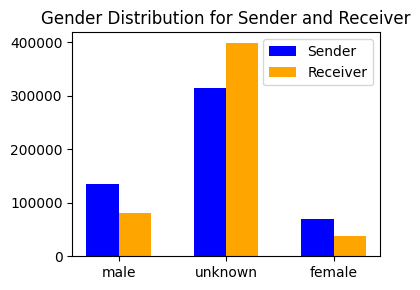

In [ ]:
#This code creates a grouped bar chart to look at the distribution of gender
all_genders = set(df['sender_gender']).union(df['receiver_gender'])
sender_counts = df['sender_gender'].value_counts().reindex(all_genders, fill_value=0)
receiver_counts = df['receiver_gender'].value_counts().reindex(all_genders, fill_value=0)

x = np.arange(len(all_genders))
plt.figure(figsize=(4, 3))
plt.bar(x - 0.15, sender_counts, 0.3, label='Sender', color='blue')
plt.bar(x + 0.15, receiver_counts, 0.3, label='Receiver', color='orange')

plt.title('Gender Distribution for Sender and Receiver')
plt.xticks(x, all_genders)
plt.legend()
plt.tight_layout()
plt.show()


As we can see above, the nltk approach is still largely failing to recognize the names in the dataset. I decide to continue with this metric for now, however, since I don't have the compute to run the entire dataset anyway. Again, data that could directly map all of these names is much less accessible than nltk, so below I will use a language model to contextually determine gender.

Currently the messages contain a lot of metadata which will make tokenization difficult. As a part of this language model based approach, I will also use a model to trim metadata, so the tokens are only relaying the information from the main message body




# Part 2: LLM Approach to Gender Classification and Cleaning

In [ ]:
"""
I dont want to use too much of my colab gpu time so I will start by analyzing
riveter_df_mini, and then move onto riveter_df, which will contain all messages
that have gendered sender and receiver.
"""
#going to use these slices later for riveter so saving them under these names
riveter_df = df[(df['sender_gender'] != 'unknown') & (df['receiver_gender'] != 'unknown')]
riveter_df['id_gendered'] = range(1, len(riveter_df) + 1)
print(riveter_df.shape)
llm_df = riveter_df.copy()

(23689, 16)


<ipython-input-12-136d2b42dfdf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riveter_df['id_gendered'] = range(1, len(riveter_df) + 1)


<Axes: title={'center': 'Text Length Distribution'}, xlabel='Length', ylabel='Frequency'>

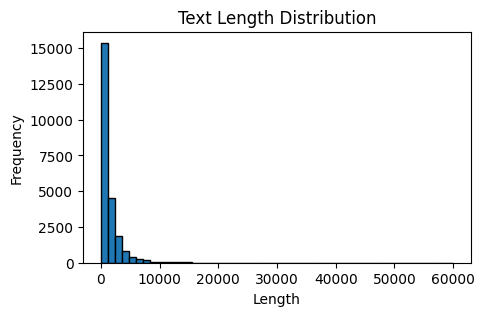

In [ ]:
"""
Using this code since I can't feed too many tokens into the model. I think that
having the metadata as context could be interesting to look at but Its not
going to be possible given the scope of this project.
"""
def truncate_message(text):
    pattern = r"X-FileName: .*?\n(.*)"
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    else:
        return None

llm_df['message_truncated'] = llm_df['message'].apply(truncate_message)

text_length = llm_df['message_truncated'].str.len()
text_length.plot(kind='hist',
                           bins=50,
                           edgecolor='black',
                           title='Text Length Distribution',
                           xlabel='Length',
                           figsize=(5, 3))

As can be seen by the figure above, some of the emails have very long lengths, which inhibits my strategy of using the llm to process the messages for information. While this could be 'solved' with a batching approach, that would remove a decent amount of context, which could hurt overall accuracy of the model. I am limited in compute and time limits on that compute, so I will demonstrate the project on a smaller length subset of the message data. Most of the messages fit within this range, meaning that if a model with a larger context window were used, it is likely that the speed wouldn't be effected too much given that only a small subset exceed the 10000 character range.

In [ ]:
#Only look at emails with smaller length
llm_df_mini = llm_df[llm_df['message'].apply(len) < 5000]
print(len(llm_df_mini))
llm_df_mini = llm_df_mini.iloc[:15]

22119


In [ ]:
"""
This code uses an LLM to clean the metadata out of the messages, so they can be
better tokenized later in riveter and other EDA
"""
from google.colab import userdata

token = userdata.get("HF_TOKEN")
login(token=token)

# model_name = "EleutherAI/gpt-neo-1.3B" #larger takes 52 min on 100 rows w/gpu
model_name = "EleutherAI/gpt-neo-125M"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name,
                                             use_auth_token=True,
                                             trust_remote_code=True,
                                             device_map="auto",
                                             torch_dtype="auto")
extract_pipeline = pipeline("text-generation",
                            model=model,
                            tokenizer=tokenizer,
                            max_length=2048,
                            trust_remote_code=True)
device = model.device

"""
This function attempts to clean the message body using an LLM, since the
messages are all so varied.
"""
def extract_message_body(text):
    prompt = (
        "Extract the main message body (ignore metadata) from the following email:\n\n"
        f"{text}\n\n"
        "Message body:"
    )
    inputs = tokenizer(prompt,
                      return_tensors="pt",
                      padding=True,
                      truncation=True,
                      max_length=2048).to(device)
    output_ids = model.generate(inputs.input_ids,
                                attention_mask=inputs.attention_mask,
                                pad_token_id=tokenizer.eos_token_id,
                                max_new_tokens=10,
                                do_sample=False
    )
    result = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    result = result.split("Message body:")[-1].strip()
    return result

#apply functions
llm_df_mini['message_llm'] = llm_df_mini['message_truncated'].progress_apply(extract_message_body)
llm_df_mini['message_llm']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

100%|██████████| 15/15 [00:03<00:00,  4.20it/s]


1      I would suggest holding the business plan meet...
3                                Phillip,\n\nI have been
14                         Dave, \n\n Here are the names
38                      John,\n\n Denver's short rockies
39                           Jim,\n\nI have been working
48     ---------------------- Forwarded by Michael Et...
50     ---------------------- Forwarded by Phillip K ...
53                                              9/8  9/7
65                           resumes of whom?\n\nMessage
70                                  Cooper,\n \n Can you
80        ---------------------- Forwarded by Kristian J
94     ---------------------- Forwarded by Janel Guer...
100                    I tried the new address but I don
102                                  Cooper,\n\nI have a
103                         Cooper,\n\n Did you add some
Name: message_llm, dtype: object

The above code takes a pretty long time with the resources that I am using right now. As I said in the comments, I went with the smaller 125M model. The messages tend to be pretty good, however, since much of this task is about filtering versus generating. The above output shows examples of the generated outputs, which were generally similar to the one full 22119 row run that I have saved to work with for the riveter and clustering.

While commented out to improve colab run all, this demo gender extracter was both expensive and largely ineffective. This error may have been due to the relatively small model being used, given that this task is much more difficult than the message filtering task.

In [ ]:
# model_name = "EleutherAI/gpt-neo-1.3B" #larger takes 52 min on 100 rows w/gpu
# # model_name = "EleutherAI/gpt-neo-125M"
# tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
# tokenizer.pad_token = tokenizer.eos_token
# model = AutoModelForCausalLM.from_pretrained(model_name,
#                                              use_auth_token=True,
#                                              trust_remote_code=True,
#                                              device_map="auto",
#                                              torch_dtype="auto")
# extract_pipeline = pipeline("text-generation",
#                             model=model,
#                             tokenizer=tokenizer,
#                             max_length=2048,
#                             trust_remote_code=True)
# device = model.device

# """
# This function attempts to replace the function of nltk and the other cleaning
# that I found on the web by extracting the gender of the sender and receiver.
# If this approach works, well, then this could make similar tasks much easier,
# as a lot of analysis on this dataset is locked behind the data cleaning, and an
# LLM approach limits the need for regex and manual inputting.
# """
# def extract_receiver_gender(text):
#     prompt = (
#         "Read the following email and determine the gender of the receiver. "
#         "You must answer with exactly one word: 'male', 'female', or 'unknown'. "
#         "Do not include any additional text.\n\n"
#         f"Email:\n{text}\n\n"
#         "answer:"
#     )
#     inputs = tokenizer(
#         prompt,
#         return_tensors="pt",
#         padding=True,
#         truncation=True,
#         max_length=2048
#     ).to(device)

#     output_ids = model.generate(
#         inputs.input_ids,
#         attention_mask=inputs.attention_mask,
#         pad_token_id=tokenizer.pad_token_id,
#         max_new_tokens=10,
#         do_sample=False
#     )
#     response = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip().lower()

#     matches = list(re.finditer(r'\b(male|female|unknown)\b', response))
#     if matches:
#         last_match = matches[-1]  # Last match (from the end)
#         return last_match.group(0)
#     else:
#         return 'unknown'  # Default to 'unknown' if no valid word is found

# llm_df_mini['receiver_gender_llm'] = llm_df_mini['message_llm'].progress_apply(extract_receiver_gender)
# print(llm_df_mini['receiver_gender_llm'].value_counts())

In [ ]:
#save the dataframe to a csv file
llm_df_mini.to_csv("####_llm_df_mini.csv", index=False)

### Message Cleaning --> success
- I felt that the message cleaning was overall a success. I successfully isolated the message body, even with a smaller model, and most of the uniqueness involved was isolated to prmopt engineering. The method also scaled to larger amounts of data, albiet requiring one of the colab gpus to run
- The results were slightly handheld by using the 'message_truncated' column instead of the flat message. While this did eliminate a lot of metadata, helping the task, it relies on my knowledge of the dataset. Part of this reason was to alleviate the smaller context window of the smaller model, but scaling up in model size did significantly increase runtime.
- Given a switch to larger models, a batching approach could be useful, and each call could clean multiple messages at once

### Gender Classification --> fail
- Gender classification, unfortunately, did not meet the same standard of nltk (even though it doesn't get everything). It had full coverage of the data, but in the two approaches that I tried, one analysing both sender and receiver and one doing both individually, The model failed to accurately guess gender most of the time. It defaulted to male for some of the more obvious answers, but even with limitations on the number of new tokens allowable, the model was fighting with the already truncated context window, and would often forget the prompting when answering
- While recommending a shot with a larger model is always an option, I think that either way some finetuning needs to be done to restrict the response more. Also, the issue of the 'unknown' gender category needs to be addressed, as given the examples that the model did output, they were only male labelled.

### LLM Methodology Results
- Using these models in an academic setting walks the line of accessibility. Like Professor said in class, the question of should I just buy a colab subscription for the course is an obstacle and a choice when applying text mining methods. On the other hand, the cleaning works, and I beleive that the gendering will work as well, given a larger model, with a larger context window and finetuning like we did in the bert labellings task homework. These approaches address my methodology goal of creating a more generalizable process. Much of the difference between these two functions is based in the prompting, which is easily changeable across tasks. Even with the compute restrictions, I still was able to get 22000 rows from the message cleaner. While this did take a significant amount of time, it was done on the free colab gpu. The Gender classifier stands as an argument against the scalability, as the extra finetuning work required to fix outputs to a desireable outcome could cost more compute than I used for the message proccessing. Particularly considering that this task only involved generation of a single additional token: "male", "female", "unknown"

# Part 3: Riveter Time!

In [ ]:
#I use this code to upload my saved riveter model
model_path = '/content/gdrive/MyDrive/colab-output/riveter-test/riveter-nlp/riveter/22000-length-1216-llm'
with open(model_path, 'rb') as file:
    riveter_llm = pickle.load(file)
print(riveter_llm)

In [ ]:
#use this code to train a new model

# #we use the filtered message so we dont get metadata in the training
# riveter_llm = Riveter()
# riveter_llm.load_sap_lexicon('power')
# riveter_llm.train(llm_df_mini['message_llm'], llm_df_mini['id'])


In [ ]:
#save the current riveter model
riveter_llm.save('#####-length-1216-llm')

Riveter successfully saved to "#####-length-1216-llm"


Here I run the get_score_totals fucntion which aggregates scores for entities (personas) throughout a text dataset based on linkage frequency to verbs from riveters connection lexicon. Because I'm looking at aggregate power across title and gender, I set the frequency threshold parameter to one, which will compile all entities, and allow a more holistic analysis on the variety of subjects and direct objects witin the dataset.

In [ ]:
#shows all of the riveter scores calculated
riveter_scores = riveter_llm.get_score_totals(frequency_threshold=1)
riveter_scores

{'i': 0.05986475735879077,
 'business plan meetings': -1.0,
 'cooper': 0.23529411764705882,
 'hunter': 0.0784313725490196,
 'west desk': -1.0,
 '2 analysts': 0.5714285714285714,
 'steve': -0.05806451612903226,
 'something': 0.0625,
 'jim:': -0.3333333333333333,
 'we': 0.1546572934973638,
 'andy:': 0.0,
 'way': -0.13333333333333333,
 'it': -0.1744186046511628,
 'message': 0.03787878787878788,
 'that feeling': 1.0,
 'p': 0.4117647058823529,
 'australia': 0.0,
 'little bit': -0.5,
 'stand alone button': 1.0,
 'ice': -1.0,
 'you': 0.1266607617360496,
 'deal': -0.5128205128205128,
 'mr sturm': 1.0,
 'lavor': 0.8,
 'bubbie': -1.0,
 'e': -0.14754098360655737,
 'restaurant': -1.0,
 'all the underdog - wouldn': 0.0,
 'him': 0.06666666666666667,
 'gaetien': 0.0,
 'task': -1.0,
 'anybody': -1.0,
 'four good tix': 1.0,
 'comments': -0.5087719298245614,
 '-----original message': -0.13333333333333333,
 'my': -0.18181818181818182,
 'tim': 0.0,
 'me': 0.10599078341013825,
 'report': 0.0208333333333333

In [ ]:
#two functions as defined in the riveter colab demo, to look at subject power
persona_polarity_verb_count_dict = riveter_llm.get_persona_polarity_verb_count_dict()
print(len(persona_polarity_verb_count_dict))
persona_score_dict = riveter_llm.get_score_totals(frequency_threshold=20)
print(len(persona_score_dict))

597
26


The below code iterates through the generated personas in riveter, which aggregate total verb matchings on a subject's participation to assign their power score.

In [ ]:
#this looks at the generated personas, I found it only to be useful at 10k+ rows
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 2), '\t', _persona)

0.15 	 we
0.13 	 you
0.11 	 me
0.09 	 mark
0.06 	 i
0.06 	 meeting
0.04 	 email
0.04 	 message
0.01 	 fyi
0.0 	 jeff
0.0 	 attached file
0.0 	 following points
0.0 	 look
0.0 	 response
-0.01 	 john
-0.01 	 kim
-0.04 	 this
-0.07 	 a
-0.1 	 the
-0.17 	 it
-0.19 	 them
-0.25 	 copy
-0.36 	 call
-0.51 	 comments
-0.51 	 deal
-0.6 	 anything


In [ ]:
#looking into the verbs that are defining the power for 'jeff'
persona_polarity_verb_count_dict['jeff']

defaultdict(<function riveter.default_dict_int()>,
            {'negative': defaultdict(int, {'need_nsubj': 4, 'want_nsubj': 4}),
             'positive': defaultdict(int,
                         {'check_nsubj': 2,
                          'receive_dobj': 2,
                          'attach_nsubj': 4})})

In the example above, we see that the persona for 'Jeff' is influenced by this profile of verbs

In [ ]:
"""
Having used riveter as a metric of power on the cleaned emails, I want to also
apply a metric of gender onto the dataset. While my initial approach to use a
model to get this outran the scope of my project, I'll be using the free namesor
api to get a confidence score and labelled gender
"""
def get_gender_namsor_batch(names):
    """
    Send a batch of names to NamSor API and return their gender probability
    scores. Process in batches of 99 names.
    """
    namesor_API_KEY = userdata.get("NM_TOKEN")
    url = "https://v2.namsor.com/NamSorAPIv2/api2/json/genderBatch"
    headers = {"X-API-KEY": namesor_API_KEY, "Content-Type": "application/json"}

    gender_scores = {}

    #using batch processing since api costs per pull
    num_batches = math.ceil(len(names) / 99)
    for batch_idx in range(num_batches):
        batch_names = names[batch_idx * 99:(batch_idx + 1) * 99]
        payload = {"personalNames": [
            {"id": str(i), "firstName": name, "lastName": ""}
            for i, name in enumerate(batch_names)
        ]}

        response = requests.post(url, json=payload, headers=headers)
        data = response.json()

        #gets the probability scores from the genders it found
        for result in data.get("personalNames", []):
            name = result.get("firstName")
            gender = result.get("likelyGender", "unknown")
            probability = result.get("probabilityCalibrated", 0.0)

            if gender == "female":
                probability = -probability
            elif gender == "male":
                probability = probability
            else:
                probability = 0.0

            gender_scores[name] = probability
    return gender_scores

In [ ]:
namesor_API_KEY = userdata.get("NM_TOKEN")
def get_gender_namsor_batch(names):
    url = "https://v2.namsor.com/NamSorAPIv2/api2/json/genderBatch"
    headers = {"X-API-KEY": namesor_API_KEY, "Content-Type": "application/json"}

    payload = {
        "personalNames": [{"id": str(i),
                           "firstName": name,
                           "lastName": ""} for i, name in enumerate(names)]
    }
    response = requests.post(url, json=payload, headers=headers)
    data = response.json()

    results = {}
    if "personalNames" in data:
        for result in data["personalNames"]:
            name = result.get("firstName", "unknown")
            likely_gender = result.get("likelyGender", "unknown")
            probability_calibrated = result.get("probabilityCalibrated", 0.0)
            if likely_gender == "male":
                results[name] = probability_calibrated
            elif likely_gender == "female":
                results[name] = -probability_calibrated
            else:
                results[name] = 0.0
    return results

# Test
test_names = ["Riley", "Alex", "Sarah"]
gender_scores = get_gender_namsor_batch(test_names)
print(gender_scores)

{'Riley': 0.7579952447825479, 'Alex': 0.9750108404939797, 'Sarah': -0.9830545378641277}


Given the riveter model trained on the data, I have a metric of power ranging from -1 to 1 depending on the entities interaction throughout the corpus. To analayze this categorization in a gendered context, I need a way of categorizing gender. Because I concluded that the llm prompting approach did not fit the goals of this project, I instead used namesor.com genderizing api. While the free plan only has limited api calls, I can use batching of inputted names to get more calls per day. These scores are also useful over the traditional nltk approach, as they give a gender confidence level, which theoretically would be helpful for analyzing pronouns, less common names, and could likely work for classifying usernames as discussed earlier.

In [ ]:
#processing to get ready for graphing and so I can save the gendered results
riveter_names = list(riveter_scores.keys())
power_scores = list(riveter_scores.values())

gender_scores = get_gender_namsor_batch(riveter_names)

data = {
    'name': riveter_names,
    'power_score': power_scores,
    'gender_score': [gender_scores.get(name, 0.0) for name in riveter_names]
}

gender_power_df = pd.DataFrame(data)

In [ ]:
#save current iteration of gender_power_df
gender_power_df.to_csv("gender_power_df_####.csv", index=False)

The below code plots power and gender score on a scatter plot, allowing me to analyze their potential relationship, as well as entity similarities 'geographically'. I will also generate boxplots to be able to get a good read on the difference between male and female power within this analyzed subset of the data. I grouped with 3 confidence levels high, low and all. High includes scores above the 95% threshold, which is primarily capturing names. Medium captures all names, but includes much more noise. Lastly the all confidence plots all datapoints for comparison.

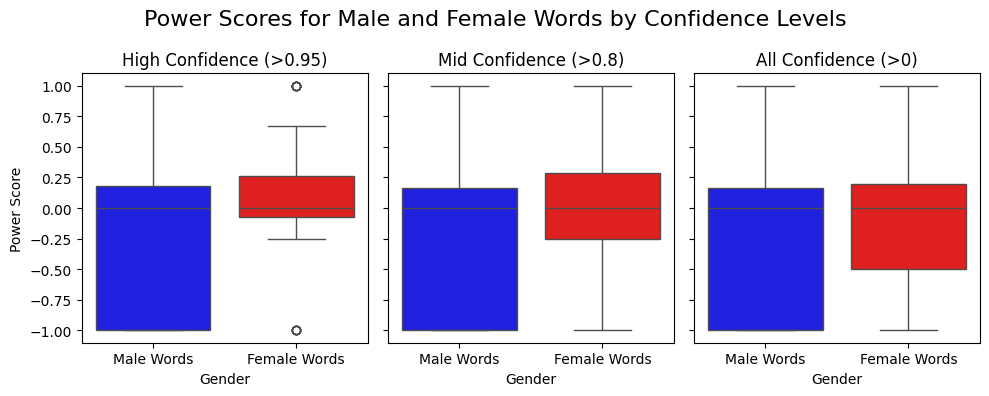

In [ ]:
#Create a scatterplot showing gender score versus power score
fig = px.scatter(
    gender_power_df,
    x="power_score",
    y="gender_score",
    hover_data=["name", "power_score", "gender_score"],
    title="Power vs Gender Scores",
    labels={"power_score": "Power Score", "gender_score": "Gender Score"},
)
fig.update_xaxes(title="Power Score", zeroline=True)
fig.update_yaxes(title="Gender Score", zeroline=True)
fig.add_hline(y=0, line=dict(color="black", width=1))  # Horizontal Line
fig.add_vline(x=0, line=dict(color="black", width=1))  # Vertical Line
fig.show()

#Leverage gender confidnence, to understand potential correlation
high_conf_df = gender_power_df[gender_power_df['gender_score'].abs() > 0.95]
mid_conf_df = gender_power_df[(gender_power_df['gender_score'].abs() > 0.75)]
all_conf_df = gender_power_df

conf_dfs = {
    'High Confidence (>0.95)': high_conf_df,
    'Mid Confidence (>0.8)': mid_conf_df,
    'All Confidence (>0)': all_conf_df
}

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
fig.suptitle("Power Scores for Male and Female Words by Confidence Levels", fontsize=16)

for ax, (title, df) in zip(axes, conf_dfs.items()):
    male_words = df.loc[df['gender_score'] > 0].copy()
    female_words = df.loc[df['gender_score'] < 0].copy()
    male_words['label'] = 'Male Words'
    female_words['label'] = 'Female Words'

    stacked_df = pd.concat([male_words, female_words])
    sns.boxplot(x='label', y='power_score', data=stacked_df, ax=ax,
                palette={'Male Words': 'blue', 'Female Words': 'red'}, hue='label', legend=False)
    ax.set_title(title)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Power Score" if ax == axes[0] else "")
plt.tight_layout()
plt.show()



As a supplement to the boxplot and scatterplot results I made histograms showing gender and power distribution. This below code outputs a single dimensional view for both power and gender score.

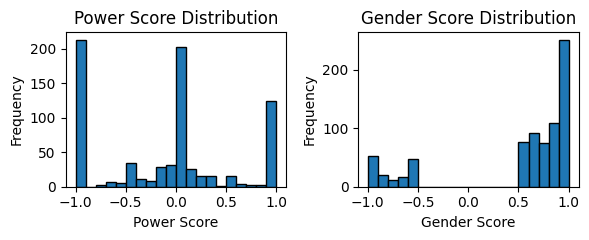

In [ ]:
#histograms of each axis
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

#power
axes[0].hist(gender_power_df['power_score'], bins=20, edgecolor='black')
axes[0].set_title('Power Score Distribution')
axes[0].set_xlabel('Power Score')
axes[0].set_ylabel('Frequency')

#gender
axes[1].hist(gender_power_df['gender_score'], bins=20, edgecolor='black')
axes[1].set_title('Gender Score Distribution')
axes[1].set_xlabel('Gender Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Riveter Analysis Results -> Interesting, but lets get more data
- Before looking into the results, its worth noting that I pulled an ordered subset of the data. I didn't want to randomly sample as that would reduce related verb subject counts pretty significantly, but this does somewhat reduce the power of my conclusions to what names nltk can correctly identify. Also, when looking at the distribution of gender, the sample size for female labellings is much smaller than that for the male labellings. This isn't surprising given the barchart from earlier showing the sender-receiver gender distributions.
- Recall from the research hypothesis: "Men will show more power-associated language than women,". This data does not support the claim, given that the spread of the female names have a higher power ranking than the male names at all gender confidence levels. Considering name-verb pairs as involvment in power through text, rather than the direct application of power, these results could support the idea that in a male dominated gender environment, women feel less inclined to participate, which could be expressed through mapping verbs to objects more often than to names. Prabhakaran's paper also expressed a much higher discrepency in the mean ODP (overt displays of power) counts of male superiors than any other group. Additionally, female-subordiante ODP was the next highest, followed by male subordiante, followed by female superiors (Prabhakaran et. al). Steffensmeier's study concluded that Enron didn't have many "highly placed or powerful white-collar female criminals." What this could entail is the idea of "relational closeness" and groups within conspiracy being primirily male dominated, and that these clusters were the objects where ODP's were expressed at Enron.
- While these results do support this sort of story, looking at the scatterplot, again, shows inconsistency in the gender classification. The API has trouble differentiating words from uncommon female names in America, as can be seen with the word 'he' (chinese female name) at ~ (0.33, -0.5) which's position might otherwise show that males do on average exhibit than accept power in the dataset. However, 'she' does exhibit a higher power score of ~ (0.375, -0.8), supporting the boxplot results. The two causes for indecision with these results are 1, the incompleteness of the emails profiled, and also 2, the genderizing API that I used. The high-confidence results are still majority real people being considered, but inconsistencies in labelling a basic male word like 'he' puts the object gender spread into question as relates to a US-based company like Enron. These issues support continued implemenation of an llm genderizer that can better distinguish between objects, gendered pronouns, and names in-context as directed through prompt engineering.

#Part 4: Tokenization Approach

The previous section went into the aggregate results of gender and power, addressing points 1 and 2 of the hypothesis analysis, but while it supported an alternative idea of power-laden male-dominated subnetworks it didn't give any indication of proof or shape. This next section seeks to use the cleaned data (using nltk for gender and names from the sql merged dataset) in tandem with the llm scraped messages to tokenize the messages and analyze how position and gender factor into any potential high volume clusterings of powered messages, as theorized in thre previous section.

In [ ]:
#This pulls the llm-cleaned messages with the tags from part 1
data = pd.read_csv("/content/gdrive/MyDrive/colab-output/riveter-test/riveter-nlp/riveter/22000_llm_df_mini.csv")
token_df = pd.DataFrame(data)
token_df.head()

file  \
0    allen-p/_sent_mail/10.   
1  allen-p/_sent_mail/1000.   
2   allen-p/_sent_mail/107.   
3   allen-p/_sent_mail/129.   
4    allen-p/_sent_mail/13.   

                                             message             sender_email  \
0  Message-ID: <15464986.1075855378456.JavaMail.e...  phillip.allen@enron.com   
1  Message-ID: <13505866.1075863688222.JavaMail.e...  phillip.allen@enron.com   
2  Message-ID: <2465689.1075855687605.JavaMail.ev...  phillip.allen@enron.com   
3  Message-ID: <21687372.1075855688094.JavaMail.e...  phillip.allen@enron.com   
4  Message-ID: <32300323.1075855378519.JavaMail.e...  phillip.allen@enron.com   

             receiver_email   sender_name sender_title   receiver_name  \
0   john.lavorato@enron.com  Philip Allen          NaN   John Lavorato   
1     randall.gay@enron.com  Philip Allen          NaN     Randall Gay   
2  david.delainey@enron.com  Philip Allen          NaN  David Delainey   
3   john.lavorato@enron.com  Philip Allen          NaN   John Lavorato   
4   james.steffes@enron.com  Philip Allen          NaN   James Steffes   

                                      receiver_title sender_first_name  \
0                                 CEO, Enron America            Philip   
1                                                NaN            Philip   
2  CEO, Enron North America and Enron Energy Serv...            Philip   
3                                 CEO, Enron America            Philip   
4                 Vice President, Government Affairs            Philip   

  receiver_first_name sender_last_name receiver_last_name sender_gender  \
0                John            Allen           Lavorato          male   
1             Randall            Allen                Gay          male   
2               David            Allen           Delainey          male   
3                John            Allen           Lavorato          male   
4               James            Allen            Steffes          male   

  receiver_gender  id  id_gendered  \
0            male   2            1   
1            male   4            2   
2            male  15            5   
3            male  39            6   
4            male  40            7   

                                   message_truncated  \
0  Traveling to have a business meeting takes the...   
1  Randy,\n\n Can you send me a schedule of the s...   
2  Dave, \n\n Here are the names of the west desk...   
3  John,\n\n Denver's short rockies position  bey...   
4  Jim,\n\nIs there going to be a conference call...   

                                         message_llm  
0  I would suggest holding the business plan meet...  
1                            Phillip,\n\nI have been  
2                      Dave, \n\n Here are the names  
3                   John,\n\n Denver's short rockies  
4                        Jim,\n\nI have been working

When considering a clustering analysis, and given my limited domain knowledge on the Enron hierarchy, DBSCAN seemed like a very appealing option. It figures out the cluster selection itself, and hyperparameter tuning would IN THEORY produce the optimal clustering output for analysis.

In [ ]:
#check for nulls in message_llm column and fill
print(len(token_df))
print("Num nulls in 'message_llm':", token_df['message_llm'].isnull().sum())
token_df['message_combined'] = token_df['message_llm'].fillna(token_df['message_truncated'])
messages = token_df['message_combined']

#vectorize
vectorizer = TfidfVectorizer(stop_words='english',
                             max_df=0.9,
                             min_df=2,
                             ngram_range=(1, 2))
X = vectorizer.fit_transform(messages)

#after tuning best parameters were:
best_eps= 0.3
best_min_samples= 3
best_score= 0.6206516526153429

# #hyperparameter tuning for best dbscan clustering
# best_eps = None
# best_min_samples = None
# best_score = -1

# #range of eps and min_samples values to test
# eps_range = np.arange(0.3, 1.0, 0.1)
# min_samples_range = range(3, 10, 2)

# #iterate using sillhouette score to track best parameters
# total_iterations = len(eps_range) * len(min_samples_range)
# with tqdm(total=total_iterations, desc="DBSCAN Tuning") as pbar:
#     for eps in eps_range:
#         for min_samples in min_samples_range:
#             pbar.set_postfix({'eps': eps, 'min_samples': min_samples})
#             dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
#             labels = dbscan.fit_predict(X)
#             if len(set(labels)) <= 1:
#                 pbar.update(1)
#                 continue
#             score = silhouette_score(X, labels, metric='cosine')
#             if score > best_score:
#                 best_score = score
#                 best_eps = eps
#                 best_min_samples = min_samples
#             pbar.update(1)

# print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best score: {best_score}")

#run with chosen hyperparameters (I ran the above code previously)
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric='cosine')
token_df['cluster'] = dbscan.fit_predict(X)

#running pca on the data for vis purposes
pca = PCA(n_components=2)
with tqdm(total=X.shape[0]) as pbar:
    pca_X = pca.fit_transform(X.toarray())
    pbar.update(X.shape[0])
token_df['pca_x'] = pca_X[:, 0]
token_df['pca_y'] = pca_X[:, 1]

#visualize on plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='pca_x', y='pca_y',
    hue='sender_gender',  #can pick other metrics here
    style='cluster',
    palette='Set1',
    data=token_df,
    s=100
)
plt.title("DBSCAN Clusters Colored by Sender Gender")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

22119
Num nulls in 'message_llm': 1162


100%|██████████| 22119/22119 [00:49<00:00, 446.28it/s]


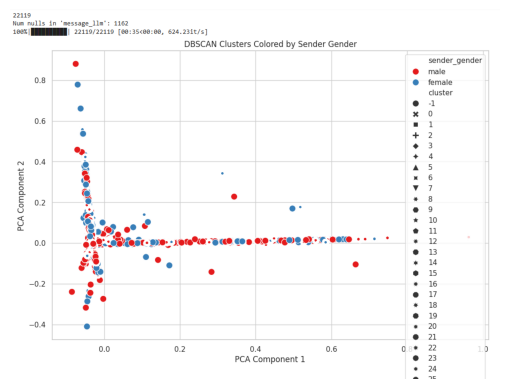

In [ ]:
#output got wacky with how many clusters there were so here is a truncated version
img = Image.open('dbscan_output_truncated.png')
plt.imshow(img)
plt.axis('off')
plt.show()

As seen above, the DBscan output had way too many clusters, and didn't leave much room for interpretability or being able to ananlyze potential role or gender based clusterings. This 2000 cluster run with optimal hyperparameters could potentially be due to the wide range of subjects and direct objects analyzed in each message. Runs with a higher minimum distance didn't perform much better, generally having around 600 clusters. I hoped that cosine similarity could mimic a similar verb power analysis like in the riveter model, however, the clustering doesn't have the same hard coded weights. However, the main purpose of this analysis was to look for potential clusterings exhibiting powered language, so I decided to use a kmeans approach instead to set a potentially less optimal, but more interpretable cluster number.

In [ ]:
"""
Dbscan had way too many clusters even if it was optimal, so I'm going to go
with kmeans to try and get something more interpretable
"""
#run kmeans
n_clusters = 10  #arbitrary cluster number
kmeans = KMeans(n_clusters=n_clusters, random_state=3350, n_init=10)
token_df['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
pca_X = pca.fit_transform(X.toarray())
token_df['pca_x'] = pca_X[:, 0]
token_df['pca_y'] = pca_X[:, 1]

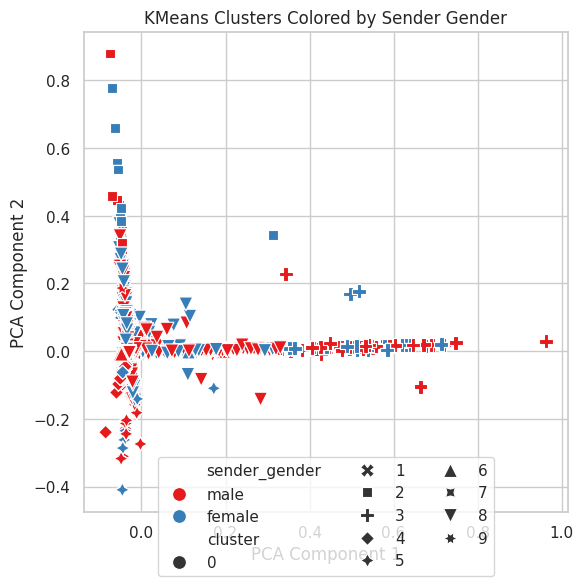

In [ ]:
#kmeans with coloring by sender gender
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='pca_x', y='pca_y',
    hue='sender_gender',
    style='cluster',
    palette='Set1',
    data=token_df,
    s=100
)
plt.title("KMeans Clusters Colored by Sender Gender")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()

With kmeans, the clusters are much more interpretable, with 5 main clusters, and the remaining only recognizing subtler differences around (0,0). Here, analyzing sender gender, notable gender clusterings include the primarily female dominated cluster 2 from component 2 0.4 to 0.8, the primarily male cluster 4 in the bottom left, and the high male density in cluster 8 around 0.2.

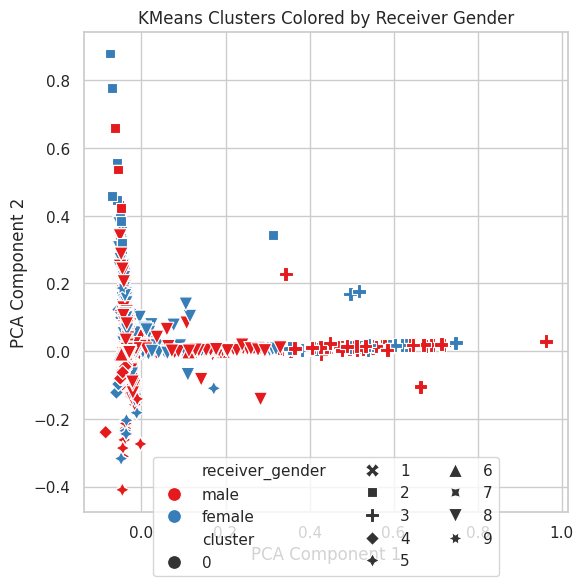

In [ ]:
#kmeans with coloring by receiver gender
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='pca_x', y='pca_y',
    hue='receiver_gender',
    style='cluster',
    palette='Set1',
    data=token_df,
    s=100
)
plt.title("KMeans Clusters Colored by Receiver Gender")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()

When looking at receiver gender, we see some similar results to sender gender, The more homogenized clusters 2 and 4 are significantly more mixed in terms of receiver gender, and the male-dense portion within cluster 8, expands towards lower pca component 1. Cluster 3 also shows higher male density around pca component 1 = 0.45.

<ipython-input-44-f7425a5ee4d8>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


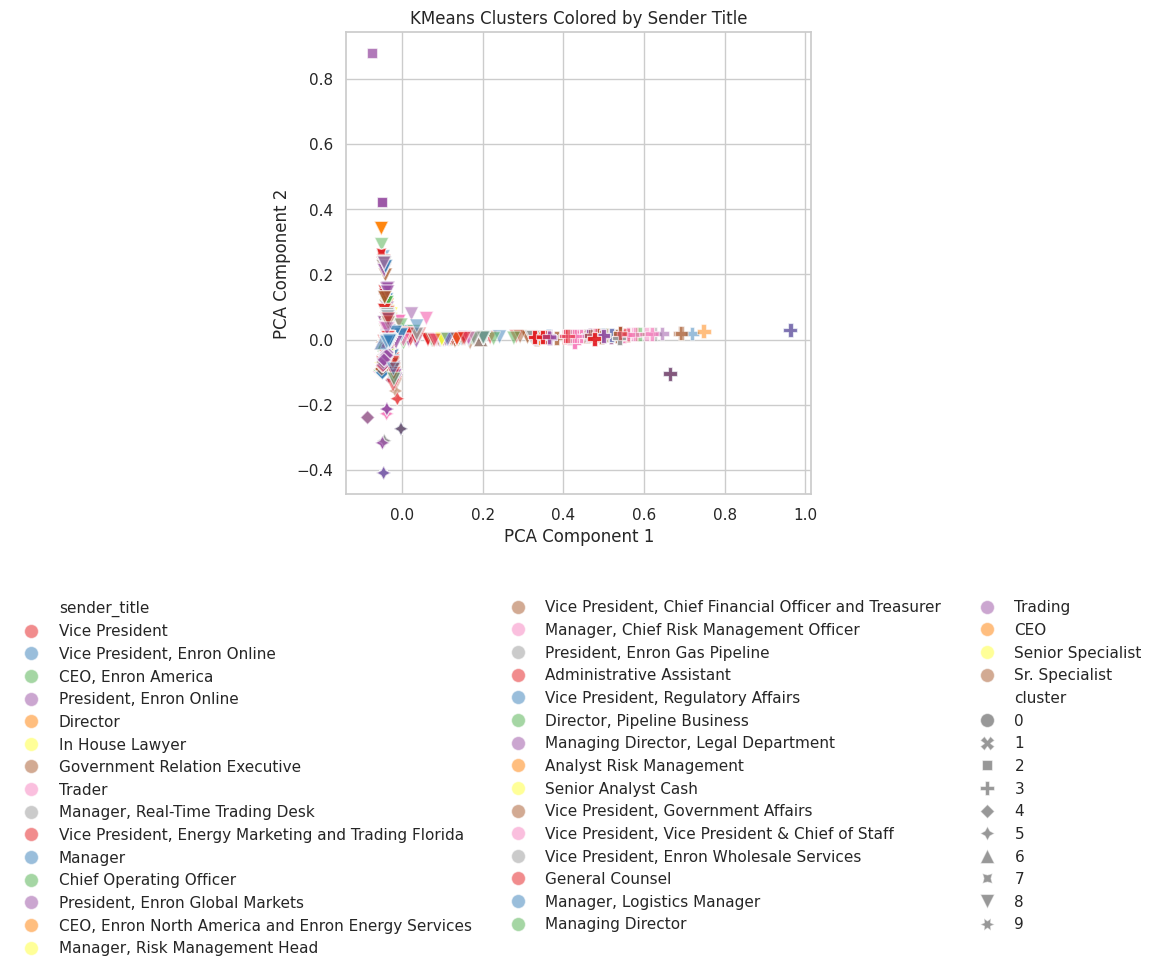

In [ ]:
#kmeans with coloring by sender title
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='pca_x', y='pca_y',
    hue='sender_title',
    style='cluster',
    palette='Set1',
    data=token_df,
    s=100,
    alpha = 0.5
)
plt.title("KMeans Clusters Colored by Sender Title")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
plt.tight_layout()
plt.show()

This clustering above, and the receiver cluster below show the positions of teh employees displayed in the clustering. On the sender side, most emails by vice presidents are in the clusters at pca component 1 = 0. This is also the case on the receiving side, indicating that vice presidents share a similar lack of pca component 1, but have varied expression on component 2. We can see in the mapping that much of clusters 2 and 5 had positionless (given the position mappings from the custodians github) employees, which is illustrated by the lack of colored points in these positions. By grouping by position, we also see a decrease in variability, as the unlabelled positions made up most of the noise branching away from pca component 2 = 0 on the right side of the graph.

<ipython-input-45-e36a49baba53>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


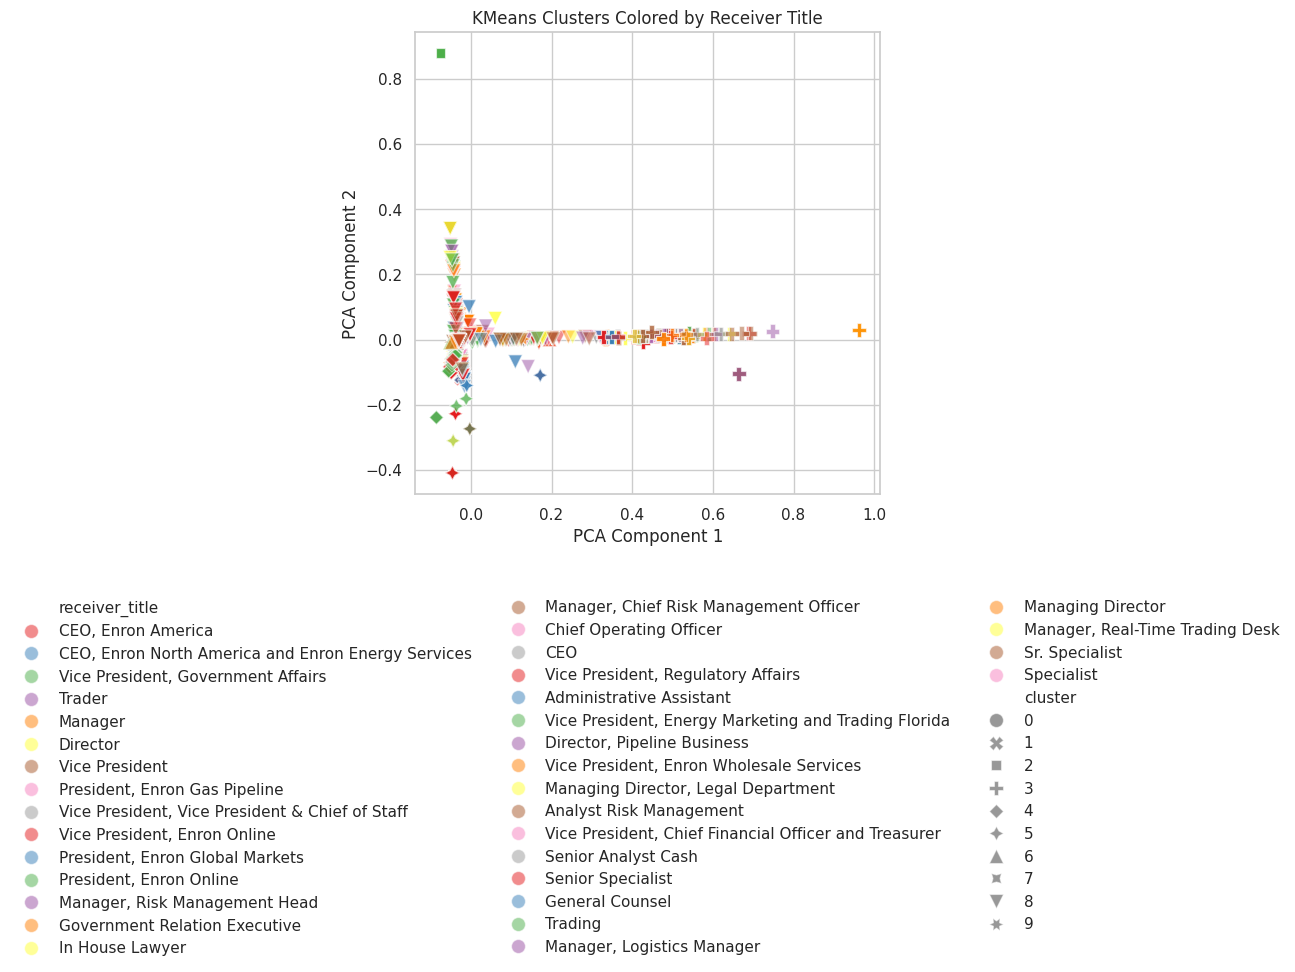

In [ ]:
#kmeans with coloring by receiver title
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='pca_x', y='pca_y',
    hue='receiver_title',
    style='cluster',
    palette='Set1',
    data=token_df,
    s=100,
    alpha = 0.5
)
plt.title("KMeans Clusters Colored by Receiver Title")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
plt.tight_layout()
plt.show()

Given these groupings by power, its difficult to see explicit association of these positions. We can use them as discrete power proxies, however, and view the clusters given what we know about their gender distribution. In the below code, I ranked positions by relative power, which assigned a score to influence the brightness of each point (high power = low brightness). By mapping these encoded power scores with transparency onto the clustering, it allows us to look at concentrations of power within the clusterings by both sender and recipient power.

In [ ]:
"""
This is kind of cheating, but I manually listed the positions by
power. I feel like generally finding a secret position of power
wasn't what I was looking to do here, so the only thing that this is
really impacting is reproducability.
"""
token_df['sender_title'].unique()
ordered_titles = [
    "CEO",
    "CEO, Enron North America and Enron Energy Services",
    "CEO, Enron America",
    "President, Enron Global Markets",
    "President, Enron Online",
    "President, Enron Gas Pipeline",
    "Chief Operating Officer",
    "Vice President, Chief Financial Officer and Treasurer",
    "Vice President, Enron Wholesale Services",
    "Vice President, Enron Online",
    "Vice President, Energy Marketing and Trading Florida",
    "Vice President, Government Affairs",
    "Vice President, Regulatory Affairs",
    "Vice President, Vice President & Chief of Staff",
    "Vice President",
    "Managing Director, Legal Department",
    "Managing Director",
    "Director, Pipeline Business",
    "Director",
    "General Counsel",
    "Manager, Chief Risk Management Officer",
    "Manager, Risk Management Head",
    "Manager, Real-Time Trading Desk",
    "Manager, Logistics Manager",
    "Manager",
    "In House Lawyer",
    "Government Relation Executive",
    "Trader",
    "Trading",
    "Analyst Risk Management",
    "Senior Analyst Cash",
    "Senior Specialist",
    "Sr. Specialist",
    "Administrative Assistant",
    "nan"
]

In [ ]:
#create a rank column based on the power ordering array
title_to_rank = {title: i for i, title in enumerate(ordered_titles)}
token_df['sender_title_rank'] = token_df['sender_title'].map(title_to_rank).fillna(len(ordered_titles))
token_df['receiver_title_rank'] = token_df['receiver_title'].map(title_to_rank).fillna(len(ordered_titles))

#generate a gradient color based on rank
power_palette = sns.light_palette("navy", as_cmap=False, reverse=True, n_colors=len(ordered_titles))
def map_color(title_rank):
    return power_palette[int(title_rank)] if title_rank < len(power_palette) else "lightgray"

token_df['sender_title_color'] = token_df['sender_title_rank'].apply(map_color)
token_df['receiver_title_color'] = token_df['receiver_title_rank'].apply(map_color)

#shapes for clusters
markers = ['o', 's', '^', 'P', '*', 'X', 'D', 'v', '<', '>']

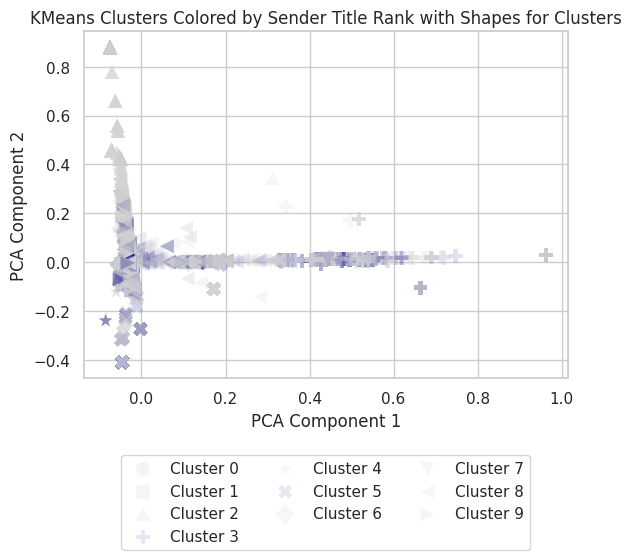

In [ ]:
#sender title kmeans with greyscale
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

for cluster_id in range(n_clusters):
    cluster_data = token_df[token_df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['pca_x'], cluster_data['pca_y'],
        c=cluster_data['sender_title_color'],
        s=100, edgecolor='none', alpha=0.2, marker=markers[cluster_id % len(markers)],
        label=f'Cluster {cluster_id}'
    )

plt.title("KMeans Clusters Colored by Sender Title Rank with Shapes for Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.tight_layout()
plt.show()


Above, looking at sender title on the clusters, we can confirm the previous intuition that the vertical offshoot at pca component 2 = 0.4 and above is dominated by low power/unlabeled individuals. Additionally, we can see concentration of powerful positions in the pca component 2 < 1 range (excluding the cluster of nonlabelled people nearby) and around the male recipient cluster at pca component 1 ~0.4. The large clustering at (0,0) is mixed, but does contain a significant portion of higher position messaging.

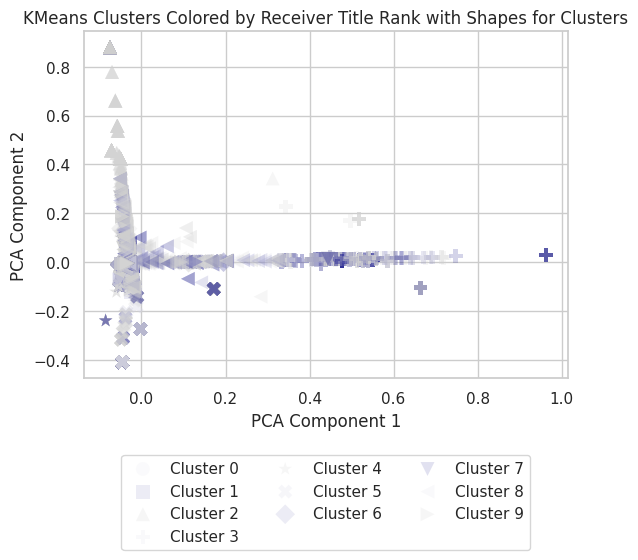

In [ ]:
#receiver title kmeans with greyscale
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

for cluster_id in range(n_clusters):
    cluster_data = token_df[token_df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['pca_x'], cluster_data['pca_y'],
        c=cluster_data['receiver_title_color'],
        s=100, edgecolor='none', alpha=0.2, marker=markers[cluster_id % len(markers)],
        label=f'Cluster {cluster_id}'
    )

plt.title("KMeans Clusters Colored by Receiver Title Rank with Shapes for Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.tight_layout()
plt.show()

The receiver color mapping showcases similar distribution as the sender color mapping. This indicates that pca component positioning is likely more dependent on an aggregated sender-recipient relationship than simply the sender or receiver position demanding a certain type of text input. This while this distinction makes it more difficult to stricly denote high mixed and low 'power environments', given the similar cluster groupings, there generally seem to be power concentrations around (0.4,0), mixed to high around (0,-0.3), and a high volume mixed concentration at (0,0).

### Tokenization Approach Results
- I discussed how one of the primary goals of this tokenization approach was to analyze the research goal of "relational closeness". As shown in the DBscan, the tokenization was likely analyzing disjoint features to the riveter results. The following notable gender kmeans clusterings were located for senders and receivers, with the rest of the data being relatively mixed, reflecting an overarching mixed gender environment at Enron:
  - Sender:
    - cluster 2 from component 2 0.4 to 0.8 -> primarily female
    - cluster 4 in negative component 2 values -> primarily male
    - cluster 3 at component 1 ~0.45 -> primarily male
    - cluster 8 at componeent 1 ~0.2
  - Recipient:
    - clusters 2&4 more mixed than for sender
    - cluster 3 -> primarily male
    - larger cluster 8 male segment

- When looking at the clustered title colorings with these clusters in mind, cluster 8 is the real standout, as the female dominated cluster 2, was largely non-labelled employees. The lack of a distinct female-executive cluster could support the idea of a more 'hands off' female disposition within a male dominated executive gender environment. Cluster 4 is likely not related to power, at least in a traditional sense. The mixed title power of this cluster likely implies that these predominately male emails have some other relational factor. Lastly, cluster 8 gives rise to a potential male-dominated grouping. While the explicit exclusion factor isn't visible, the outcome of segmentation is, when looking at the results. While it is possible that there is only one such cluster, this broader appraoch of attempting to create and map a continuous variable for power, damages the visibility of a single contriubutor.

## 4. Discussion and Conclusions
#### Conclusion
> "Individuals within a workplace network adjust their communication style, specifically their choice of verbs, tone, and formality based on hierarchical position, gender dynamics, and perceived relational closeness. Men will show more power-associated language than women, while senders will align their communication style with personas tied to their workplace role."

- By modelling the workplace network, and caputuring verb use, tone, and formality through riveter, I defined 'power' of an entity within this network, and compared gendered data points on this continuum to show empirically that women in general exhibited higher power in Enron workplace communication.
- Enron's documented criminal activity as discussed by Steffensmeier et. al shows that work channels were used as a platform for non-work criminal networking, and the theory developed from the riveter results that there may be a male-executive cohort with lots of power exhibition, as supported by the claim that there weren't prevalent criminal executive women at enron engaged heavily in these networks. Using kmeans clustering supported by nltk and an llm message body extracter, I modelled message similarity in two dimensions, and did notice a predominately male clustering of messages to and from high power work titles. This could support the idea of relational closeness between the Enron employees, with the larger (0,0) cluster representing standard work activity, and the
- These findings did not explicitly reveal any paradigm for downward communication, given that the sender and recipient clusterings weren't significantly different. This could however support the idea of alligning both ones communication style and the message to that person based on their role, which lines up with conclusions from past research detailing the effect of gender environment on employee messaging.
- One consideration for future study is how important verb choice will be with the advent of proprietary AI systems in companies across the US. I know when I need to write an email I will ask an LLM to help me format. Delegating the power consideration could reduce the usefulness of this task, however, these LLM's are still trained on data like Enron that contains these power embeddings. I think gender-power analysis like this should be applied to social networks to see power imbalance or potential abuse in direct messageing. I also think it could be used to find a leadership core in group discussion, even if one doesn't formally exist.
#### Methodological Effectiveness
- riveter package
  - The set up was a bit tedious, and it required an older version of transformers to run, which made finding a huggingface model with enough parameters that worked on the same version a bit tedious. However, the power analysis was very helpful, and their documentation made it pretty simple to implement beyond that. In terms of the results, the package provided a strong metric of power beyond simply ranking titles that didn't rely on domain expertise. I feel that it was a very good fit for this task, however when working in a more informal setting (ie. instagram or twitter data) how would it deal with non-traditional verbs, sentence structure, and mispelling I'm not sure.
- LLM prompting as a means for data cleaning
  - Huggingface makes it very easy to go about model selection, and apart from certain parameters requiring outside access, and some models requiring additional permissions, the rest of the implementation would be pretty cookie-cutter for additional text mining tasks. The message cleaning function worked well, especially given the low quality model that I was using. As I said before, that task is more cleaning less generating so this behavior makes sense. The one issue I did run into was the size of the context window being too small. this approach could be fixed by batching, even though batching would reduce the connectedness of some text data that might need to be analyzed in other tasks.
- Genderizing message senders and recipients
  - nltk
    - this approach I felt was generally the most reliable. All I had to do was download the names data and the functionality did the rest. This approach was a bit rigid, and combined with regex it wasn't a natural fit to getting the sender and recepient names directly from the message. However, with the sql merge from the custodian dataset, it had a clear list of names to genderize, and it performed much better than the other methods. However, it will likely not be the case in other adjacent projects that data like this already exists.
  - namesor API
    - Overall I felt like this api did a pretty good job. It had a bit of a tough time given that it was presented with both people and objects. However, the confidence score that it gave returned pretty good accuracy at higher confidence. The flexibility of the input is pretty good, and I think that this api would be the best approach with international names, but likely not the case for usernames or other names not in its data
  - LLM approach
    - I really wanted this to work. The appeal was all there with task flexibility restricted to the prompting, and name flexibility laced within the ideally billion plus parameters in the model. Unfortunately, given the resources that I had, the runs on this function didn't follow the prompt, as they were likely outweighed by the the number of tokens that the email occupied. This could be seen in that many of the outputs were simply trying to continue the email. Another indication was that the responses that did include gender were almost all male, showing some understanding of the prompt, but still not accuracy. I think that in future this will be the way to go, but in order for that to happen I will need to be able to use a larger model, train for longer, and then once those results are more reflective of sender and recipient gender, begin finetuning and merging send and receive functions.

### Methodology 'Wishlist' for Further Research
- Bigger models: This will help to better improve the llm-based methodology
- Gender Identified Enron Corpus: The Prabhakaran et al study said this was freely available online, but I did a lot of searching with no luck. Having this dataset would greatly validate the riveter analysis and greatly increase the number of rows, and thus personas that could be analyzed.
- Unlimited access to a genderizer with confidence prediction: I only used the namesor apion the riveter stuff since my api key didn’t have enough space to use on the larger dataset. As I said in the previous section I think that it performs pretty well on names. When including other naming conventions I would append confidence score to my llm genderizer wishlist.
- More colab gpu time: More time with the colab gpu would significantly increse the potential breadth and performance of this project, allowing for more rows to be analyzed and bigger models to be used in the llm methodology.

### What I Could Have Done Differently
- I could have done a hybrid approach where I use nltk or regex to get a filtered down version of the messages and then and used the model as a double check method to genderize or message trim.
- For gender prediction I could try to finetune a model like we did with the BERT genre labellings in a previous pset. The context window would likely be too small for the emails though, so I would likely have to do a batching approach where I save the best guesses for subject and recipient across model calls.
- I should have used cuml for scikit learn portion of the tokenization approach. PCA on 500k data points would not have gone very smoothly on my cpu, but my methodology didn't account for actually looking at the whole dataset.
